<a href="https://colab.research.google.com/github/rajatlamsal00977/Project-1/blob/main/Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this project we try to use  the linear and nonlinear regression to find the relation between the variables in the table below.

Rajat Lamsal<br>
Bishnu Rijal<br>
Pratim khadka<br>
Instructor: Nicolas Jachob.

CPSMA 4413 NUMERICAL METHODS -01.

In [ ]:

import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import pandas as pa


%matplotlib inline

In [ ]:
data = pa.read_csv('https://raw.githubusercontent.com/nurfnick/Applied_Stats_Jupyter_Notebooks/master/student.csv')

Using fillna function to replace empty cell with zeros for easier calculation.

In [ ]:
data.fillna(0, inplace = True)

In [ ]:
data

,Year,Gender,Smoke,Award,HigherSAT,Exercise,TV,Height,Weight,Siblings,BirthOrder,VerbalSAT,MathSAT,SAT,GPA,Pulse,Piercings
0,Senior,M,No,Olympic,Math,10.0,1.0,71.0,180.0,4,4.0,540,670,1210,3.13,54,0.0
1,Sophomore,F,Yes,Academy,Math,4.0,7.0,66.0,120.0,2,2.0,520,630,1150,2.50,66,3.0
2,FirstYear,M,No,Nobel,Math,14.0,5.0,72.0,208.0,2,1.0,550,560,1110,2.55,130,0.0
3,Junior,M,No,Nobel,Math,3.0,1.0,63.0,110.0,1,1.0,490,630,1120,3.10,78,0.0
4,Sophomore,F,No,Nobel,Verbal,3.0,3.0,65.0,150.0,1,1.0,720,450,1170,2.70,40,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
357,Sophomore,F,Yes,Nobel,Verbal,2.0,0.0,83.0,130.0,1,1.0,550,540,1090,3.44,80,3.0
358,Sophomore,M,Yes,Olympic,Math,8.0,10.0,61.0,180.0,2,1.0,600,620,1220,3.00,74,0.0
359,Sophomore,F,Yes,Nobel,Verbal,1.0,1.0,65.0,150.0,2,2.0,540,450,990,3.27,78,2.0
360,FirstYear,M,Yes,Olympic,Verbal,14.0,5.0,77.0,205.0,2,2.0,550,550,1100,2.30,72,0.0


Text(0, 0.5, 'SAT Scores')

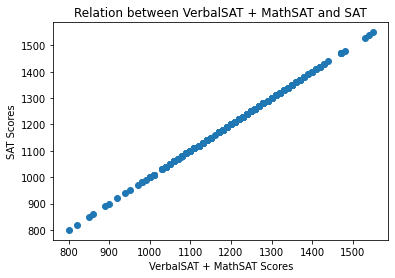

In [ ]:
plt.scatter(data["VerbalSAT"]+data["MathSAT"],data["SAT"])
plt.title("Relation between VerbalSAT + MathSAT and SAT")
plt.xlabel("VerbalSAT + MathSAT Scores")
plt.ylabel("SAT Scores")

In [ ]:
stats.pearsonr(data["VerbalSAT"]+data["MathSAT"],data["SAT"])

(1.0, 0.0)

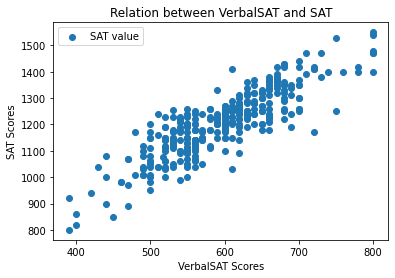

In [ ]:
plt.scatter(data["VerbalSAT"],data["SAT"], label="SAT value")
plt.title("Relation between VerbalSAT and SAT")
plt.xlabel("VerbalSAT Scores")
plt.ylabel("SAT Scores")
plt.legend()

In [ ]:
stats.pearsonr(data["VerbalSAT"],data["SAT"])

(0.86263272072066, 1.3463071839818128e-108)

**Linear Regression**

Utilizing Scipy Stats package and hand method the regression would take the form, $\hat y = a_0+a_1 x$ 

$$
a_1=\frac{\sum x_i y_i -n \bar x \bar y}{\sum x_i^2 - n\bar x ^2}
$$
and
$$
a_0 = \bar y - a_1 \bar x
$$

In [ ]:
def sum(list): ## to contain our x(not) and y(not)
  total = 0
  for i in list:
    total = total + i
  return total

def squareAndSum(list1,list2): ## to find our xx and xy
  total = 0
  for i in range(len(list1)): ## using len function to return the total number of objects that is inside of our data.
    total = total + list1[i]*list2[i]
  return total



In [ ]:
n = len(data['VerbalSAT'])
xbar = sum(data['VerbalSAT'])/n
ybar = sum(data['SAT'])/n
xy = squareAndSum(data['VerbalSAT'],data['SAT'])
xx = squareAndSum(data['VerbalSAT'],data['VerbalSAT'])

a1 = (xy-n*xbar*ybar)/(xx-n*xbar**2)
a0 = ybar - a1*xbar

In [ ]:
print("xy = ",xy)

print ("xx = ",xx)

print("x̅ = ",xbar)

print("ȳ = ", ybar)

print ("n = ",n)

xy =  261698176
xx =  129794889
x̅ =  594.1906077348066
ȳ =  1203.6270718232045
n =  362


In [ ]:
def fomulaRegression(variable,slope, intercept):
  return variable*slope+intercept

In [ ]:
print(f"slope = {a1}")
print(f"intercept = {a0}")


slope = 1.4104835321366764
intercept = 365.5310046629761


Now we are using regression built in package to check our work.

In [ ]:
ourRegression = stats.linregress(data["VerbalSAT"],data["SAT"])
ourRegression

LinregressResult(slope=1.4104835321366782, intercept=365.5310046629751, rvalue=0.8626327207206598, pvalue=1.346307183982045e-108, stderr=0.04359092696421324)

In [ ]:
m = ourRegression[0]
b = ourRegression[1]

print(f"slope = {m}")
print(f"intercept = {b}")
def y(x):
    return(m*x+b)

slope = 1.4104835321366782
intercept = 365.5310046629751


Text(0, 0.5, 'SAT Scores')

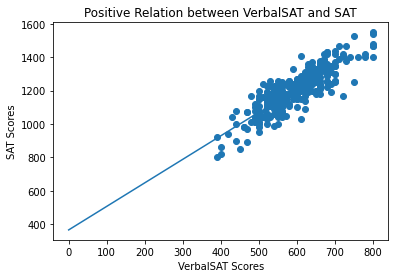

In [ ]:
x = np.arange( 0,500,1)
plt.scatter(data["VerbalSAT"],data["SAT"])
plt.plot(x,y(x))

plt.title("Positive Relation between VerbalSAT and SAT")
plt.xlabel("VerbalSAT Scores")
plt.ylabel("SAT Scores")


In [ ]:
#sum of the residuals
s = 0
for i in range (0,len(data["VerbalSAT"])):
    s = s+y(data["VerbalSAT"][i])-data["SAT"][i]

In [ ]:
s

5.3660187404602766e-11

In [ ]:
ss = 0
for i in range (0,len(data["VerbalSAT"])):
    ss = ss+(y(data["VerbalSAT"][i])-data["SAT"][i])**2

In [ ]:
ss

1358730.7270751342

Arranging these datasets in system of linear equation/matrix form and solving with any methods for instance Gaussian Elimination method.
$$
\left[
\begin{array}{ccc|c}
n& \sum x_i&\sum x_i^2&\sum y_i\\
\sum x_i&\sum x_i^2&\sum x_i^3&\sum x_i y_i\\
\sum x_i^2 &\sum x_i^3&\sum x_i^4&\sum x_i^2 y_i
\end{array}
\right]
$$
 The equation will take the following form.
$$
\hat y = a_0+a_1 x+a_2 x^2
$$



Text(0.5, 1.0, 'Relation Between Birthorder and Number of Siblings')

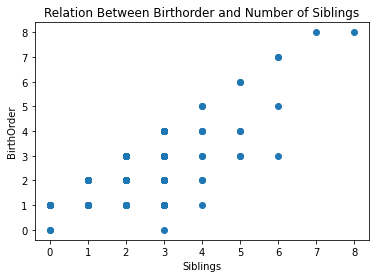

In [ ]:
plt.scatter(data["Siblings"],data["BirthOrder"])
plt.xlabel("Siblings")
plt.ylabel("BirthOrder")
plt.title("Relation Between Birthorder and Number of Siblings")


In [ ]:
x = sum(data['Siblings'])
xx = squareAndSum(data['Siblings'],data['Siblings'])
xxx = squareAndSum(data['Siblings']**2,data['Siblings'])
xxxx = squareAndSum(data['Siblings']**3,data['Siblings'])

matrix = [[n,x,xx,sum(data['BirthOrder'])]
          ,[x,xx,xxx,squareAndSum(data['Siblings'],data['BirthOrder'])]
          ,[xx,xxx,xxxx,squareAndSum(data['Siblings']**2,data['BirthOrder'])]
          ]

In [ ]:
import math
import numpy as np
import scipy.linalg as la

def addRows(matrix,targetRow, modifierRow, value):
  newRow = matrix[targetRow,:]+value*matrix[modifierRow,:]
  newMatrix = []
  for i in range(len(matrix)):
    if i != targetRow:
      newMatrix.append(matrix[i,:])
    else:
      newMatrix.append(newRow)
  return np.array(newMatrix)


def changeToLeadingOne(matrix,row,column):
  newMatrix =[]
  for i in range(len(matrix)):
    if i != row:
      newMatrix.append(matrix[i,:])
    else:
      newMatrix.append(1/matrix[row,column]*matrix[row,:])
  return np.array(newMatrix)


def gaussJordan(matrix):
  newMatrix = matrix
  for pivot in range(len(matrix)):
    newMatrix = changeToLeadingOne(newMatrix,pivot,pivot)
    for column in range(0,pivot):
      newMatrix = addRows(newMatrix,column,pivot,-newMatrix[column,pivot])
    for column in range(pivot+1,len(matrix)):
      newMatrix = addRows(newMatrix,column,pivot,-newMatrix[column,pivot])
  return newMatrix

In [ ]:
gaussJordan(np.array(matrix))

array([[1.        , 0.        , 0.        , 1.05210048],
       [0.        , 1.        , 0.        , 0.22811289],
       [0.        , 0.        , 1.        , 0.08448391]])

In [ ]:
result = gaussJordan(np.array(matrix))[:,-1]
result

array([1.05210048, 0.22811289, 0.08448391])

In [ ]:
def quadRegression(x):
  results = result[0] + result[1]*x + result[2]*x*x
  return results

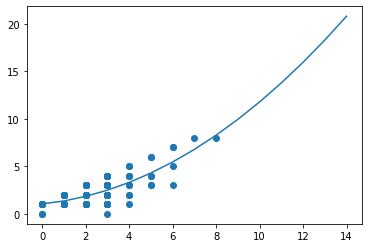

In [ ]:
x = np.arange( 0,15,1)
plt.scatter(data["Siblings"],data["BirthOrder"])
plt.plot(x,quadRegression(x))

**FINDINGS** 

We tried to fit the polynomial to our dataset. There were different methods of fitting to dataset. But we worked on polynomial one. At first we tried to find the polynomial that fits with our dataset. The polynomial fitting models invlove just a single Y and a single X. We created the matrix from our dataset using the Summation and Squaresum methods. Then we used the Gauss-Jordon law from our project 4 to solve the matrix which provided us the equation for the problem. We are pretty sure it worked as we intended because the polynomial fitting model is suitable in Non-Linear regression if we use the interpolation.

